In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from emnist import extract_training_samples, extract_test_samples

In [3]:
# Load the EMNIST dataset
x_train, y_train = extract_training_samples('letters')
x_test, y_test = extract_test_samples('letters')

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(len(x_train))
print(len(x_test))

99840
24960


In [4]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = y_train - 1
y_test = y_test - 1

# Reshape the data to have a single channel (grayscale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
# Create a CNN model
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Fitting the model
model.fit(x_train, y_train, epochs=8)
model.save('alphabets_cnn.model')

Epoch 1/8
3120/3120 [==============================] - 48s 15ms/step - loss: 0.4453 - accuracy: 0.8606
Epoch 2/8
3120/3120 [==============================] - 45s 15ms/step - loss: 0.2300 - accuracy: 0.9239
Epoch 3/8
3120/3120 [==============================] - 44s 14ms/step - loss: 0.1835 - accuracy: 0.9364
Epoch 4/8
3120/3120 [==============================] - 46s 15ms/step - loss: 0.1514 - accuracy: 0.9463
Epoch 5/8
3120/3120 [==============================] - 45s 15ms/step - loss: 0.1295 - accuracy: 0.9523
Epoch 6/8
3120/3120 [==============================] - 45s 14ms/step - loss: 0.1113 - accuracy: 0.9582
Epoch 7/8
3120/3120 [==============================] - 43s 14ms/step - loss: 0.0982 - accuracy: 0.9620
Epoch 8/8
3120/3120 [==============================] - 42s 14ms/step - loss: 0.0888 - accuracy: 0.9651
INFO:tensorflow:Assets written to: alphabets_cnn.model\assets


INFO:tensorflow:Assets written to: alphabets_cnn.model\assets


In [7]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

780/780 [==============================] - 2s 3ms/step - loss: 0.2315 - accuracy: 0.9345
Test Loss: 0.2315, Test Accuracy: 0.9345


1/1 [==============================] - 0s 51ms/step
				  The letter is probably:
						' B '


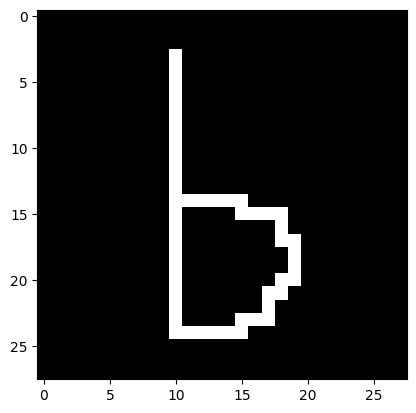

In [14]:
# Load and use the model
model = tf.keras.models.load_model('alphabets_cnn.model')

# Load and preprocess the image
img = cv2.imread("alphabets/smallb.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img / 255.0
img = img.reshape(1, 28, 28, 1)

# Make prediction
prediction = model.predict(img)
predicted_label = np.argmax(prediction)
recognized_character = chr(predicted_label + ord('A'))

print("\t\t\t\t  The letter is probably:\n\t\t\t\t\t\t'", recognized_character, "'")
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()